In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahibmmmdzad","key":"afffe48fb80ff34739f67766fd13e48a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download muhammadkhalid/sign-language-for-numbers

Dataset URL: https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
License(s): CC0-1.0


In [ ]:
import zipfile
with zipfile.ZipFile('/content/sign-language-for-numbers.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset1')

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('/content/dataset1'):
    print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}'.")

There are 1 directiories and 0 images in '/content/dataset1'.
There are 11 directiories and 0 images in '/content/dataset1/Sign Language for Numbers'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/5'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/1'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/3'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/9'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/0'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/4'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/7'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/unknown'.
There are 0 directiories and 1500 images in '/content/dataset1/Sign Language for Numbers/2'.
There 

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)

# Assuming your images are stored in subdirectories within 'dataset/Sign-language-digits-dataset'
train_dir="/content/dataset1/Sign Language for Numbers"  # Changed to directory path
test_dir="/content/dataset1/Sign Language for Numbers" # Changed to directory path

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode="categorical",
                                                               shuffle=True,
                                                               batch_size=32,
                                                               image_size=IMG_SIZE,
                                                               validation_split=0.2, # Added validation split
                                                               subset='training', # Specifying training subset
                                                               seed=123) # Added seed for reproducibility


test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE,
                                                               validation_split=0.2, # Added validation split
                                                               subset='validation', # Specifying validation subset
                                                               seed=123) # Added seed for reproducibility

Found 16500 files belonging to 11 classes.
Using 13200 files for training.
Found 16500 files belonging to 11 classes.
Using 3300 files for validation.


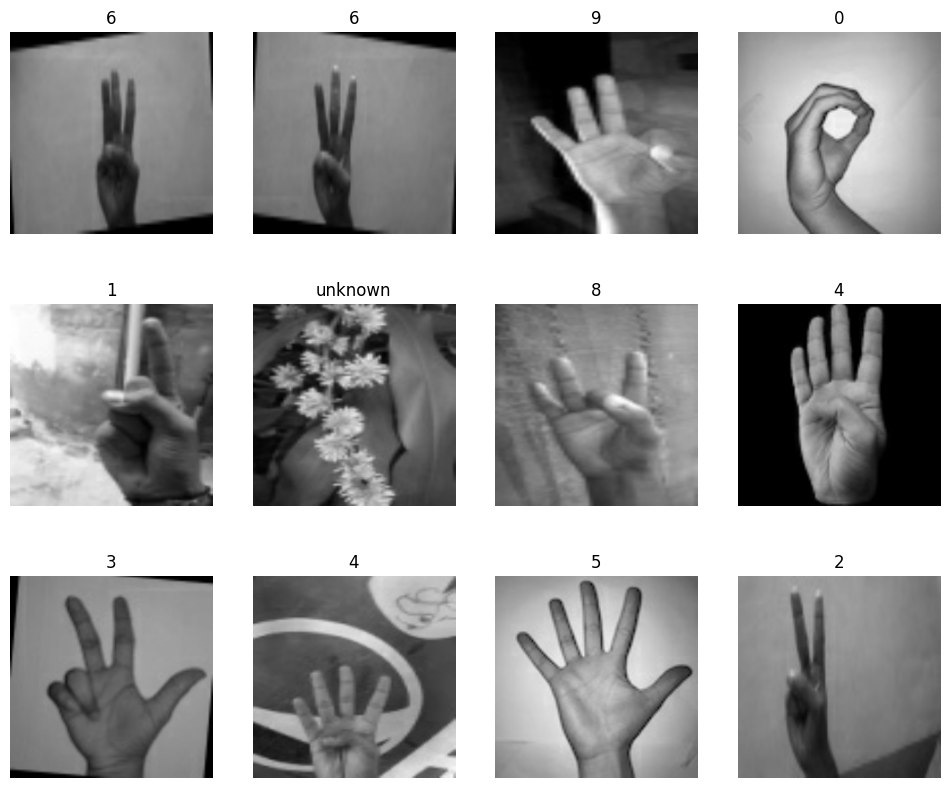

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class_names = train_data.class_names
plt.figure(figsize=(12,10))

for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[np.argmax(labels[i].numpy())])
        plt.axis('off')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Rescaling(1./255),

    # Blok 1
    layers.Conv2D(64, 7, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D(2),

    # Blok 2
    layers.Conv2D(128, 7, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.Conv2D(128, 7, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D(2),

    # Blok 3
    layers.Conv2D(256, 7, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.Conv2D(256, 7, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D(2),

    # Fully Connected
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(11, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='CategoricalCrossentropy',
    metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=12,class_weight={0: 1.0, 10: 0.5}
)


In [ ]:
input_layer=tf.keras.layers.Input(shape=[224, 224, 3])
x=tf.keras.applications.resnet50.preprocess_input(input_layer)
base_model=tf.keras.applications.ResNet50(include_top=False,input_tensor=x)
avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(len(class_names),activation='softmax')(avg)
model=tf.keras.Model(inputs=input_layer,outputs=output)

In [ ]:
base_model.trainable=False

In [ ]:
initial_learning_rate=0.01
lr_scheduler=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=300,decay_rate=0.95,staircase=True)
early_stopping=tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True,monitor='val_loss')
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('sign.keras',save_best_only=True,monitor='val_loss')
model.compile(loss='CategoricalCrossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_scheduler),
              metrics=['accuracy','f1_score'])
model.fit(train_data,epochs=6,validation_data=test_data,class_weight={0: 1.0, 10: 0.5},callbacks=[early_stopping,checkpoint_cb])

Epoch 1/6


Exception ignored in: <function _xla_gc_callback at 0x7cc2740a00e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


413/413 ━━━━━━━━━━━━━━━━━━━━ 81s 123ms/step - accuracy: 0.9317 - f1_score: 0.9317 - loss: 0.2955 - val_accuracy: 0.9064 - val_f1_score: 0.9071 - val_loss: 0.6437
Epoch 2/6
413/413 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9469 - f1_score: 0.9470 - loss: 0.2429 - val_accuracy: 0.9433 - val_f1_score: 0.9444 - val_loss: 0.4095
Epoch 3/6
413/413 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.9621 - f1_score: 0.9623 - loss: 0.1700 - val_accuracy: 0.9200 - val_f1_score: 0.9215 - val_loss: 0.5835
Epoch 4/6
413/413 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9571 - f1_score: 0.9572 - loss: 0.1867 - val_accuracy: 0.9542 - val_f1_score: 0.9542 - val_loss: 0.3625
Epoch 5/6
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9760 - f1_score: 0.9760 - loss: 0.0940 - val_accuracy: 0.9415 - val_f1_score: 0.9416 - val_loss: 0.4070
Epoch 6/6
413/413 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step - accuracy: 0.9786 - f1_score: 0.9786 - loss: 0.0858 - val_accuracy: 0.9312 - val_f1_score: 0.930

In [ ]:
model.evaluate(test_data)

104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9463 - f1_score: 0.9454 - loss: 0.2250


[0.2535093128681183,
 0.9472727179527283,
 <tf.Tensor: shape=(11,), dtype=float32, numpy=
 array([0.98958325, 0.9662921 , 0.8991735 , 0.96085405, 0.915625  ,
        0.9850249 , 0.91908395, 0.9128919 , 0.92896163, 0.95469254,
        0.9916248 ], dtype=float32)>]

In [ ]:
model.save('sign1.keras')

In [ ]:
print("Model output shape:", model.output_shape)

Model output shape: (None, 11)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


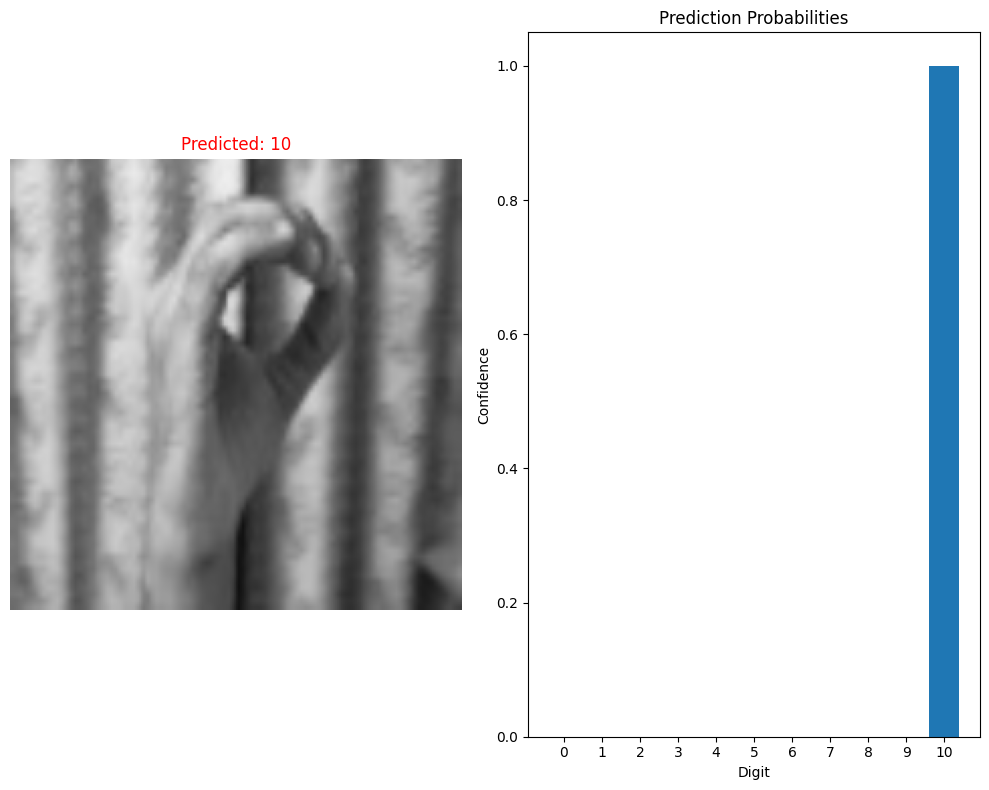

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

# Assuming your model predicts digits from 0 to 10 (double check this!)
class_names = [str(i) for i in range(11)]  # 0–10 — is that correct?

def pred_and_plot(model, image_path, true_class):
    plt.figure(figsize=(10, 8))

    # Load and preprocess image
    image = mpimg.imread(image_path)

    # Check and adjust image dimensions
    if image.ndim == 2:  # If grayscale, add channel dimension
        image = image[..., np.newaxis]

    # If shape (H, W, 1) or (H,W) convert to (H, W, 3)
    # by repeating grayscale to 3 channels
    image = np.repeat(image, 3, axis=-1) if image.shape[-1] != 3 else image

    image = tf.image.resize(image, size=[224, 224])
    image = image / 255.0  # normalize if your model expects this

    # Make prediction
    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred = class_names[np.argmax(pred_probs)]

    # Display image and prediction result
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    color = 'g' if pred == str(true_class) else 'r'
    plt.title(f'Predicted: {pred}', color=color)
    plt.axis('off')

    # Show prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(class_names, pred_probs[0])
    plt.title('Prediction Probabilities')
    plt.xlabel('Digit')
    plt.ylabel('Confidence')
    plt.tight_layout()
    plt.show()

# ✅ CALL THE FUNCTION HERE, outside the definition
pred_and_plot(model, "/content/dataset1/Sign Language for Numbers/0/zero_1.jpg", '0')